<a href="https://colab.research.google.com/github/SungchulLee/colab/blob/main/reinforcement_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###***Chapter 1 Markov Chain***

######***Not a Simple Random Walk in 1D***

state:  0, next_state:  0, transition_prob: 0.6000
state:  0, next_state:  1, transition_prob: 0.4000
state:  1, next_state:  2, transition_prob: 0.4000
state:  2, next_state:  3, transition_prob: 0.4000
state:  3, next_state:  3, transition_prob: 0.8000
state:  3, next_state:  3, transition_prob: 0.8000
state:  3, next_state:  3, transition_prob: 0.8000
state:  3, next_state:  2, transition_prob: 0.2000
state:  2, next_state:  2, transition_prob: 0.4000
state:  2, next_state:  2, transition_prob: 0.4000
state:  2, next_state:  3, transition_prob: 0.4000
state:  3, next_state:  3, transition_prob: 0.8000
state:  3, next_state:  3, transition_prob: 0.8000
state:  3, next_state:  3, transition_prob: 0.8000
state:  3, next_state:  3, transition_prob: 0.8000
state:  3, next_state:  3, transition_prob: 0.8000
state:  3, next_state:  3, transition_prob: 0.8000
state:  3, next_state:  3, transition_prob: 0.8000
state:  3, next_state:  2, transition_prob: 0.2000
state:  2, next_state:  3, tran

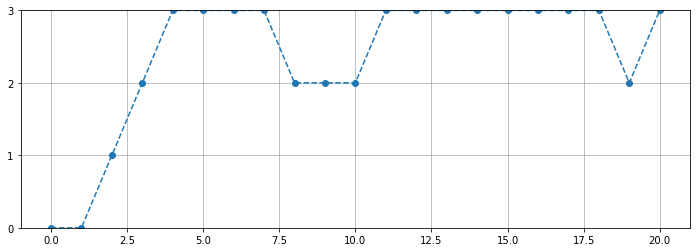

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)

# states of markov chain
states = [0,1,2,3]
n_states = len(states)

# P[i,j] transition probability of jumping from i to j
l = 0.2
r = 0.4
s = 1-l-r
P = np.empty((n_states, n_states))
#             0   1   2   3   
P[ 0, :] = [s+l,  r,  0,  0]
P[ 1, :] = [  l,  s,  r,  0]
P[ 2, :] = [  0,  l,  s,  r]
P[ 3, :] = [  0,  0,  l,s+r]

# initial state
state = np.random.choice(states) 

# run markov chain
num_steps = 20
msg = "state: {:2}, next_state: {:2}, transition_prob: {:.4f}" 
state_history = []
state_history.append(state)
for _ in range(num_steps):
    next_state = np.random.choice(states, p=P[state, :])
    prob = P[state, next_state]
    print(msg.format(state, next_state, prob))
    state = next_state
    state_history.append(state)
    
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(state_history, 'o--')
ax.set_ylim([-0.1,3.1])
ax.set_yticks([0,1,2,3])
ax.set_ylim(0,3)
ax.grid()
plt.show()

######***Stationary Distribution as a Limit of Distribution***

***Definition of Stationary Distribution $\pi$***

$$\begin{array}{lll}
(1)&\pi[i]\ge 0\quad\text{for sll $i$}\\
(2)&\sum_i\pi[i]=1\\
(3)&\pi {\bf P} = \pi
\end{array}$$

$$
\left[\begin{array}{ccccc}\pi[0]&\pi[1]&\pi[2]&\pi[3]\end{array}\right]
\left[\begin{array}{ccccc}
{\bf P}[0,0]&{\bf P}[0,1]&{\bf P}[0,2]&{\bf P}[0,3]\\
{\bf P}[1,0]&{\bf P}[1,1]&{\bf P}[1,2]&{\bf P}[1,3]\\
{\bf P}[2,0]&{\bf P}[2,1]&{\bf P}[2,2]&{\bf P}[2,3]\\
{\bf P}[3,0]&{\bf P}[3,1]&{\bf P}[3,2]&{\bf P}[3,3]
\end{array}\right]
=
\left[\begin{array}{ccccc}\pi[0]&\pi[1]&\pi[2]&\pi[3]\end{array}\right]
$$

***How to find Stationary Distribution $\pi$***

$$\pi {\bf P} = \pi,\quad \sum_i\pi[i]=1$$

$$\pi {\bf P} = \pi{\bf I},\quad \pi{\bf 1}=1$$

$$\pi ({\bf P}-{\bf I}) = [0,0,0,0],\quad \pi{\bf 1}=1$$

$$\pi \underbrace{\left[({\bf P}-{\bf I}), {\bf 1}\right]}_{\bf A} = \underbrace{[0,0,0,0,1]}_{\bf b}$$

***Theorem (Stationary Distribution as a Limit of Distribution)***

Under mild conditions,

1. Stationary distribution $\pi$ exists.

2. Stationary distribution $\pi$ exists uniquely.

3. For any initial distribution $\pi_0$, as $n\rightarrow\infty$

$$
\pi_n=\pi_0{\bf P}^n\quad\Rightarrow\quad\pi
$$

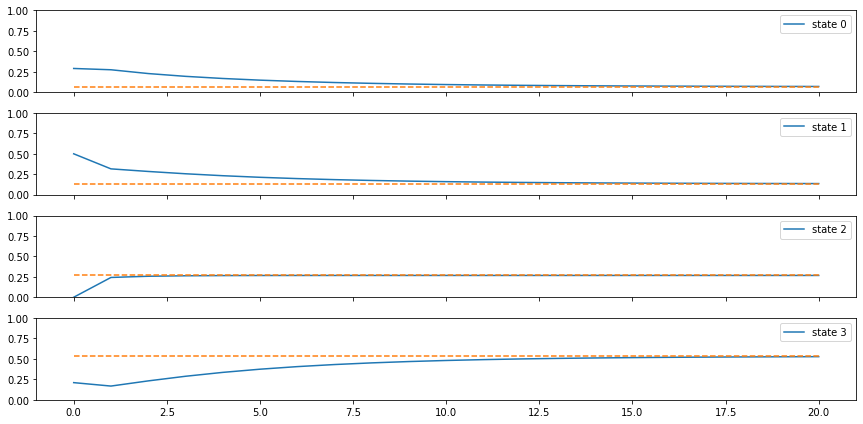

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
from scipy import linalg 

# states of markov chain
states = [0,1,2,3]
n_states = len(states)

# P[i,j] transition probability of jumping from i to j
l = 0.2
r = 0.4
s = 1-l-r
P = np.empty((n_states, n_states))
#             0   1   2   3   
P[ 0, :] = [s+l,  r,  0,  0]
P[ 1, :] = [  l,  s,  r,  0]
P[ 2, :] = [  0,  l,  s,  r]
P[ 3, :] = [  0,  0,  l,s+r]

# initial distribution
distribution = np.random.uniform(size=(len(states),)) 
distribution /= np.sum(distribution)

# distribution as a function of time
num_steps = 20
distribution_history = [distribution]
for i in range(num_steps):
    current_distribution = distribution_history[-1].reshape((1,-1)) 
    next_distribution = current_distribution @ P 
    next_distribution = next_distribution.reshape((-1,))
    next_distribution /= np.sum(next_distribution) 
    distribution_history.append(next_distribution)
distribution_history = np.array(distribution_history)

# stationary distribution
A = np.c_[P - np.eye(n_states), np.ones((n_states,1))]
b = np.zeros((1, n_states+1)); b[0,-1] = 1
pi, residue, rank, singular_values = linalg.lstsq(A.T, b.T)
pi = pi.T

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 6), sharex=True)
for s in range(n_states):
    axes[s].plot(distribution_history[:,s], label="state {}".format(str(s)))
    axes[s].plot([0, num_steps], [pi[0,s], pi[0,s]], '--')
    axes[s].legend(loc='upper right')
    axes[s].set_ylim([0., 1.])   
plt.tight_layout()
plt.show()

######***Stationary Distribution  as a Limit of Empirical Distribution***

***Theorem (Stationary Distribution as a Limit of Empirical Distribution)***

1. Generate a simulated path of many steps.

2. For each time step $n$, using the first $n$ steps of sample path compute empirical PMF $\pi_n$:

$$
\pi_n[i]=\frac{\#\ \mbox{visits of state $i$ up to time $n$}}{n}
$$

Under mild conditions, for each state $i$, as $n\rightarrow\infty$

$$
\pi_n[i]\rightarrow\pi[i]
$$

where $\pi$ is the unique stationary distribution.

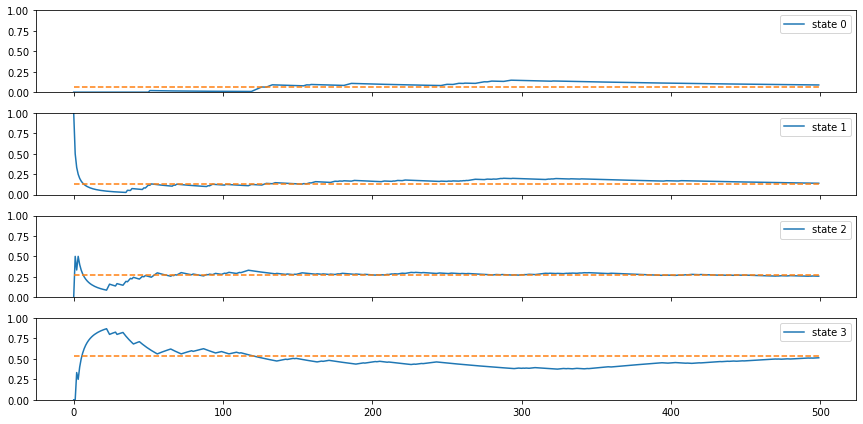

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)
from scipy import linalg 

# states of markov chain
states = [0,1,2,3]
n_states = len(states)

# P[i,j] transition probability of jumping from i to j
l = 0.2
r = 0.4
s = 1-l-r
P = np.empty((n_states, n_states))
#             0   1   2   3   
P[ 0, :] = [s+l,  r,  0,  0]
P[ 1, :] = [  l,  s,  r,  0]
P[ 2, :] = [  0,  l,  s,  r]
P[ 3, :] = [  0,  0,  l,s+r]

# initial state
state = np.random.choice(states) 

# stationary distribution
A = np.c_[P - np.eye(n_states), np.ones((n_states,1))]
b = np.zeros((1, n_states+1)); b[0,-1] = 1
pi, residue, rank, singular_values = linalg.lstsq(A.T, b.T)
pi = pi.T

# stationary distribution by simulation
n_steps = 500
visit_log = np.zeros((n_states, n_steps))     
for step in range(n_steps):
    visit_log[state, step] = 1.
    next_state = np.random.choice(states, p=P[state, :])
    state = next_state
pi_ = np.cumsum(visit_log, axis=1) / (np.arange(n_steps) + 1).reshape((1,-1))
    
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 6), sharex=True)
for s in range(n_states):
    axes[s].plot(pi_[s], label="state {}".format(str(s)))
    axes[s].plot([0, n_steps-1], [pi[0,s], pi[0,s]], '--')
    axes[s].legend(loc='upper right')
    axes[s].set_ylim([0., 1.])   
plt.tight_layout()
plt.show()

###***Chapter 2 Markov Decision Process***

######***MDP Simulation***

***State***

$$\begin{array}{|c|c|c|c|c|c|c|c|}\hline
0&1&2&3\\\hline
4&&5&6\\\hline
7&8&9&10\\\hline
\end{array}$$

***Action***

- 0: Left

- 1: Right

- 2: Up

- 3: Down

***Transition Probability***

- You move according to your action with 80$\%$ probability. 

- Your move may have a left and right one click error with 10$\%$ probability each. 

- If there is a barrier against your move, your move bounds back.

***Reward***

- -0.02 for each action.

- If you reach the state 3, you win and get the final reward 1 in addition.

- If you reach the state 6, you lose and get the final reward -1 in addition.

***Discount Factor***

$$\gamma=0.99$$

***Policy***

- When you are at state $s$, there are many actions you can choose.

- Policy descibe how you choose your action.

***Bad Policy*** 

$$\begin{array}{|c|c|c|c|c|c|c|c|}\hline
\Rightarrow&\Rightarrow&\Rightarrow&1\\\hline
\Downarrow&&\Rightarrow&-1\\\hline
\Rightarrow&\Rightarrow&\Uparrow&\Uparrow\\\hline
\end{array}$$

***Random Policy***

```
policy = 0.25*np.ones((n_states, n_actions))
```

***Optimal Policy*** 

$$\begin{array}{|c|c|c|c|c|c|c|c|}\hline
\Rightarrow&\Rightarrow&\Rightarrow&1\\\hline
\Uparrow&&\Uparrow&-1\\\hline
\Uparrow&\Leftarrow&\Leftarrow&\Leftarrow\\\hline
\end{array}$$

***Optimal Policy with Noise*** 

- we use optimal policy with probability 1/(1+eps)

- we use random policy with probability ep/(1+eps)



<img src="https://sswm.info/sites/default/files/inline-images/INKCINCT%202007.%20What%20is%20your%20water%20policy%20-%20Changes%20in%20existing%20water%20and%20sanitation%20policies.jpg">

Source [Creating Policies and a Legal Framework (RR)](https://sswm.info/es/water-nutrient-cycle/reuse-and-recharge/softwares/creating-and-enabling-environment/creating-policies-and-a-legal-framework-%28rr%29)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)

# states
states = [0,1,2,3,4,5,6,7,8,9,10]
n_states = len(states) # 11

# actions
actions = [0,1,2,3] # left, right, up, down
n_actions = len(actions) # 4

# transition probabilities
# P[current_state,specific_action,next_state] is 
# transition probability of jumping to next_state
# when we are at current_state and we do specific_action
P = np.empty((n_states, n_actions, n_states))
#                0   1   2   3   4   5   6   7   8   9  10
P[ 0, 0, :] = [ .9,  0,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 1, :] = [ .1, .8,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 2, :] = [ .9, .1,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 0, 3, :] = [ .1, .1,  0,  0, .8,  0,  0,  0,  0,  0,  0]
#                0   1   2   3   4   5   6   7   8   9  10
P[ 1, 0, :] = [ .8, .2,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 1, :] = [  0, .2, .8,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 2, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 3, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]
#                0   1   2   3   4   5   6   7   8   9  10
P[ 2, 0, :] = [  0, .8, .1,  0,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 1, :] = [  0,  0, .1, .8,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 2, :] = [  0, .1, .8, .1,  0,  0,  0,  0,  0,  0,  0]
P[ 2, 3, :] = [  0, .1,  0, .1,  0, .8,  0,  0,  0,  0,  0]
#                0   1   2   3   4   5   6   7   8   9  10
P[ 3, 0, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 1, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 2, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 3, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
#                0   1   2   3   4   5   6   7   8   9  10
P[ 4, 0, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 1, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 2, :] = [ .8,  0,  0,  0, .2,  0,  0,  0,  0,  0,  0]
P[ 4, 3, :] = [  0,  0,  0,  0, .2,  0,  0, .8,  0,  0,  0]
#                0   1   2   3   4   5   6   7   8   9  10
P[ 5, 0, :] = [  0,  0, .1,  0,  0, .8,  0,  0,  0, .1,  0]
P[ 5, 1, :] = [  0,  0, .1,  0,  0,  0, .8,  0,  0, .1,  0]
P[ 5, 2, :] = [  0,  0, .8,  0,  0, .1, .1,  0,  0,  0,  0]
P[ 5, 3, :] = [  0,  0,  0,  0,  0, .1, .1,  0,  0, .8,  0]
#                0   1   2   3   4   5   6   7   8   9  10
P[ 6, 0, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 1, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 2, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 3, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
#                0   1   2   3   4   5   6   7   8   9  10
P[ 7, 0, :] = [  0,  0,  0,  0, .1,  0,  0, .9,  0,  0,  0]
P[ 7, 1, :] = [  0,  0,  0,  0, .1,  0,  0, .1, .8,  0,  0]
P[ 7, 2, :] = [  0,  0,  0,  0, .8,  0,  0, .1, .1,  0,  0]
P[ 7, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .9, .1,  0,  0]
#                0   1   2   3   4   5   6   7   8   9  10
P[ 8, 0, :] = [  0,  0,  0,  0,  0,  0,  0, .8, .2,  0,  0]
P[ 8, 1, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .2, .8,  0]
P[ 8, 2, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]
P[ 8, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]
#                0   1   2   3   4   5   6   7   8   9  10
P[ 9, 0, :] = [  0,  0,  0,  0,  0, .1,  0,  0, .8, .1,  0]
P[ 9, 1, :] = [  0,  0,  0,  0,  0, .1,  0,  0,  0, .1, .8]
P[ 9, 2, :] = [  0,  0,  0,  0,  0, .8,  0,  0, .1,  0, .1]
P[ 9, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .1, .8, .1]
#                0   1   2   3   4   5   6   7   8   9  10
P[10, 0, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0, .8, .1]
P[10, 1, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0,  0, .9]
P[10, 2, :] = [  0,  0,  0,  0,  0,  0, .8,  0,  0, .1, .1]
P[10, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0,  0, .1, .9]

# rewards
# -0.02 for each action.
# If you reach the state 3, you win and get the final reward 1 in addition.
# If you reach the state 6, you lose and get the final reward -1 in addition.
R = -0.02 * np.ones((n_states, n_actions, n_states)) 
R[:,:,3] = - 0.02 + 1
R[:,:,6] = - 0.02 - 1

# discount factor
gamma = 0.99

# policy
if 0: 
    # bad policy 
    policy = np.empty((n_states, n_actions))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,0,1]
    policy[5,:] = [0,1,0,0]
    policy[6,:] = [0,1,0,0]
    policy[7,:] = [0,1,0,0]
    policy[8,:] = [0,1,0,0]
    policy[9,:] = [0,0,1,0]
    policy[10,:] = [0,0,1,0]
elif 0: 
    # random policy
    policy = 0.25*np.ones((n_states, n_actions))
elif 0: 
    # optimal policy 
    policy = np.empty((n_states, n_actions))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
elif 1: 
    # optimal policy + noise 
    # we use optimal policy with probability 1/(1+eps)
    # we use random policy with probability ep/(1+eps)
    eps = 0.1
    policy = np.empty((n_states, n_actions))
    policy[0,:] = [0,1,0,0] # optimal policy
    policy[1,:] = [0,1,0,0] # optimal policy
    policy[2,:] = [0,1,0,0] # optimal policy
    policy[3,:] = [0,1,0,0] # optimal policy
    policy[4,:] = [0,0,1,0] # optimal policy
    policy[5,:] = [0,0,1,0] # optimal policy
    policy[6,:] = [0,0,1,0] # optimal policy
    policy[7,:] = [0,0,1,0] # optimal policy
    policy[8,:] = [1,0,0,0] # optimal policy
    policy[9,:] = [1,0,0,0] # optimal policy
    policy[10,:] = [1,0,0,0] # optimal policy
    policy = policy + (eps/4)*np.ones((n_states, n_actions))
    policy = policy / np.sum(policy, axis=1).reshape((n_states,1))

# MDP Simulation
epoch = 10
msg = "s: {:2}, a: {}, r: {:5.2f}, s1: {:2}, done: {:1}, prob: {:.3}" 
for _ in range(epoch):

    # indicate game is not over yet
    done = False
    
    # choose initial state randomly, not from 3 or 6
    s = np.random.choice([0, 1, 2, 4, 5, 7, 8, 9, 10])  

    while not done:
        # choose action using current policy
        a = np.random.choice(actions, p=policy[s, :])
        
        # probaility of choosing action a under the current policy
        prob = policy[s, a]
        
        # choose next state using transition probabilities
        s1 = np.random.choice(states, p=P[s, a, :])
        
        # print current situation
        msg_to_print = msg.format(s, a, R[s, a, s1], s1, done, prob)
        print(msg_to_print)
        
        if (s1 == 3):
            # if win, 
            # ready to break while loop by letting done = True
            done = True
            # print final win comment
            print('final reward 1 obtained and win the game!')
        elif (s1 == 6):
            # if lose, 
            # ready to break while loop by letting done = True
            done = True
            # print final lose comment
            print('final reward -1 obtained and lose the game!')
        else:
            # if game is not over, 
            # continue playing game
            s = s1     

s:  7, a: 2, r: -0.02, s1:  7, done: 0, prob: 0.932
s:  7, a: 2, r: -0.02, s1:  4, done: 0, prob: 0.932
s:  4, a: 2, r: -0.02, s1:  0, done: 0, prob: 0.932
s:  0, a: 1, r: -0.02, s1:  1, done: 0, prob: 0.932
s:  1, a: 1, r: -0.02, s1:  2, done: 0, prob: 0.932
s:  2, a: 1, r:  0.98, s1:  3, done: 0, prob: 0.932
final reward 1 obtained and win the game!
s: 10, a: 0, r: -1.02, s1:  6, done: 0, prob: 0.932
final reward -1 obtained and lose the game!
s:  4, a: 2, r: -0.02, s1:  0, done: 0, prob: 0.932
s:  0, a: 1, r: -0.02, s1:  1, done: 0, prob: 0.932
s:  1, a: 1, r: -0.02, s1:  2, done: 0, prob: 0.932
s:  2, a: 1, r:  0.98, s1:  3, done: 0, prob: 0.932
final reward 1 obtained and win the game!
s:  1, a: 1, r: -0.02, s1:  2, done: 0, prob: 0.932
s:  2, a: 1, r:  0.98, s1:  3, done: 0, prob: 0.932
final reward 1 obtained and win the game!
s:  4, a: 2, r: -0.02, s1:  0, done: 0, prob: 0.932
s:  0, a: 1, r: -0.02, s1:  1, done: 0, prob: 0.932
s:  1, a: 1, r: -0.02, s1:  1, done: 0, prob: 0.93

######***MDP Success Rate Simulation***

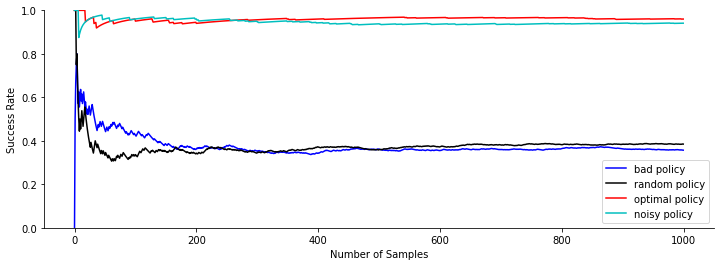

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)

# states
states = [0,1,2,3,4,5,6,7,8,9,10]
n_states = len(states) # 11

# actions
actions = [0,1,2,3] # left, right, up, down
n_actions = len(actions) # 4

# transition probabilities
# P[current_state,specific_action,next_state] is 
# transition probability of jumping to next_state
# when we are at current_state and we do specific_action
P = np.empty((n_states, n_actions, n_states))
#                0   1   2   3   4   5   6   7   8   9  10
P[ 0, 0, :] = [ .9,  0,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 1, :] = [ .1, .8,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 2, :] = [ .9, .1,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 0, 3, :] = [ .1, .1,  0,  0, .8,  0,  0,  0,  0,  0,  0]
#                0   1   2   3   4   5   6   7   8   9  10
P[ 1, 0, :] = [ .8, .2,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 1, :] = [  0, .2, .8,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 2, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 3, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]
#                0   1   2   3   4   5   6   7   8   9  10
P[ 2, 0, :] = [  0, .8, .1,  0,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 1, :] = [  0,  0, .1, .8,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 2, :] = [  0, .1, .8, .1,  0,  0,  0,  0,  0,  0,  0]
P[ 2, 3, :] = [  0, .1,  0, .1,  0, .8,  0,  0,  0,  0,  0]
#                0   1   2   3   4   5   6   7   8   9  10
P[ 3, 0, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 1, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 2, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 3, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
#                0   1   2   3   4   5   6   7   8   9  10
P[ 4, 0, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 1, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 2, :] = [ .8,  0,  0,  0, .2,  0,  0,  0,  0,  0,  0]
P[ 4, 3, :] = [  0,  0,  0,  0, .2,  0,  0, .8,  0,  0,  0]
#                0   1   2   3   4   5   6   7   8   9  10
P[ 5, 0, :] = [  0,  0, .1,  0,  0, .8,  0,  0,  0, .1,  0]
P[ 5, 1, :] = [  0,  0, .1,  0,  0,  0, .8,  0,  0, .1,  0]
P[ 5, 2, :] = [  0,  0, .8,  0,  0, .1, .1,  0,  0,  0,  0]
P[ 5, 3, :] = [  0,  0,  0,  0,  0, .1, .1,  0,  0, .8,  0]
#                0   1   2   3   4   5   6   7   8   9  10
P[ 6, 0, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 1, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 2, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 3, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
#                0   1   2   3   4   5   6   7   8   9  10
P[ 7, 0, :] = [  0,  0,  0,  0, .1,  0,  0, .9,  0,  0,  0]
P[ 7, 1, :] = [  0,  0,  0,  0, .1,  0,  0, .1, .8,  0,  0]
P[ 7, 2, :] = [  0,  0,  0,  0, .8,  0,  0, .1, .1,  0,  0]
P[ 7, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .9, .1,  0,  0]
#                0   1   2   3   4   5   6   7   8   9  10
P[ 8, 0, :] = [  0,  0,  0,  0,  0,  0,  0, .8, .2,  0,  0]
P[ 8, 1, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .2, .8,  0]
P[ 8, 2, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]
P[ 8, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]
#                0   1   2   3   4   5   6   7   8   9  10
P[ 9, 0, :] = [  0,  0,  0,  0,  0, .1,  0,  0, .8, .1,  0]
P[ 9, 1, :] = [  0,  0,  0,  0,  0, .1,  0,  0,  0, .1, .8]
P[ 9, 2, :] = [  0,  0,  0,  0,  0, .8,  0,  0, .1,  0, .1]
P[ 9, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .1, .8, .1]
#                0   1   2   3   4   5   6   7   8   9  10
P[10, 0, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0, .8, .1]
P[10, 1, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0,  0, .9]
P[10, 2, :] = [  0,  0,  0,  0,  0,  0, .8,  0,  0, .1, .1]
P[10, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0,  0, .1, .9]

# rewards
# -0.02 for each action.
# If you reach the state 3, you win and get the final reward 1 in addition.
# If you reach the state 6, you lose and get the final reward -1 in addition.
R = -0.02 * np.ones((n_states, n_actions, n_states)) 
R[:,:,3] = - 0.02 + 1
R[:,:,6] = - 0.02 - 1

# discount factor
gamma = 0.99

# policy
def decide_policy(policy_name='optimal'):
    if policy_name=='bad': 
        # bad policy 
        policy = np.empty((n_states, n_actions))
        policy[0,:] = [0,1,0,0]
        policy[1,:] = [0,1,0,0]
        policy[2,:] = [0,1,0,0]
        policy[3,:] = [0,1,0,0]
        policy[4,:] = [0,0,0,1]
        policy[5,:] = [0,1,0,0]
        policy[6,:] = [0,1,0,0]
        policy[7,:] = [0,1,0,0]
        policy[8,:] = [0,1,0,0]
        policy[9,:] = [0,0,1,0]
        policy[10,:] = [0,0,1,0]
    elif policy_name=='random': 
        # random policy
        policy = 0.25*np.ones((n_states, n_actions))
    elif policy_name=='optimal': 
        # optimal policy 
        policy = np.empty((n_states, n_actions))
        policy[0,:] = [0,1,0,0]
        policy[1,:] = [0,1,0,0]
        policy[2,:] = [0,1,0,0]
        policy[3,:] = [0,1,0,0]
        policy[4,:] = [0,0,1,0]
        policy[5,:] = [0,0,1,0]
        policy[6,:] = [0,0,1,0]
        policy[7,:] = [0,0,1,0]
        policy[8,:] = [1,0,0,0]
        policy[9,:] = [1,0,0,0]
        policy[10,:] = [1,0,0,0]
    elif policy_name=='noisy': 
        # optimal policy + noise 
        # we use optimal policy with probability 1/(1+eps)
        # we use random policy with probability ep/(1+eps)
        eps = 0.1
        policy = np.empty((n_states, n_actions))
        policy[0,:] = [0,1,0,0] # optimal policy
        policy[1,:] = [0,1,0,0] # optimal policy
        policy[2,:] = [0,1,0,0] # optimal policy
        policy[3,:] = [0,1,0,0] # optimal policy
        policy[4,:] = [0,0,1,0] # optimal policy
        policy[5,:] = [0,0,1,0] # optimal policy
        policy[6,:] = [0,0,1,0] # optimal policy
        policy[7,:] = [0,0,1,0] # optimal policy
        policy[8,:] = [1,0,0,0] # optimal policy
        policy[9,:] = [1,0,0,0] # optimal policy
        policy[10,:] = [1,0,0,0] # optimal policy
        policy = policy + (eps/4)*np.ones((n_states, n_actions))
        policy = policy / np.sum(policy, axis=1).reshape((n_states,1))

    return policy

fig, ax = plt.subplots(figsize=(12,4))

for policy_name, color in zip(['bad','random','optimal','noisy'],['b','k','r','c']):
    policy = decide_policy(policy_name=policy_name)

    # MDP Simulation
    epoch = 1_000
    # MDP simulation
    simulation_history = []
    for _ in range(epoch):

        # indicate game is not over yet
        done = False
        
        # choose initial state randomly, not from 3 or 6
        s = np.random.choice([0, 1, 2, 4, 5, 7, 8, 9, 10])  
    
        while not done:
            # choose action using current policy
            a = np.random.choice(actions, p=policy[s, :])
            
            # choose next state using transition probabilities
            s1 = np.random.choice(states, p=P[s, a, :])

            if s1 == 3:
                # if game is over, 
                # ready to break while loop by letting done = True
                # append end result to simulation_history 
                done = True
                simulation_history.append(1.)
            elif s1 == 6:
                # if game is over, 
                # ready to break while loop by letting done = True
                # append end result to simulation_history 
                done = True
                simulation_history.append(0.)
            else:
                # if game is not over, continue playing game
                s = s1

    history = np.cumsum(simulation_history) / (np.arange(epoch) + 1)

    ax.plot(history,color=color,label=policy_name+' policy')

ax.set_ylim(0,1)
ax.set_ylabel('Success Rate')
ax.set_xlabel('Number of Samples')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

###***Chapter 10 ChatGPT***

[카이스트 김대식 교수 | (1부) “인공지능 시대에 애플의 움직임이 없는 이유” 처음 듣는 챗GPT 이야기](https://www.youtube.com/watch?v=eCKS_etvZyI) [카이스트 김대식 교수 | (2부) “챗GPT는 더 강력한 인공지능의 티저” 처음 듣는 챗GPT 이야기](https://www.youtube.com/watch?v=-BOI9k5sXSs) 

[[샤로잡다] 챗GPT는 어떻게 내 질문에 대답할까? 탄생기부터 작동원리까지 | 김건희 교수](https://www.youtube.com/watch?v=Iu8YkQqn8Qk)